<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/feature_importance_by_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
df=pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
df1=df.head(30)

In [37]:
df1.shape

(30, 14)

In [38]:
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.045170,-0.206796,0.192352,-0.086146,0.039228,-0.005230,-0.521625,-0.060967,0.045389,-0.280774,0.235948,0.023269,-0.228984
sex,0.045170,1.000000,-0.127171,0.099393,-0.228590,0.042126,-0.115784,-0.063597,0.413493,0.280653,-0.292174,0.146945,0.076102,-0.463713
cp,-0.206796,-0.127171,1.000000,0.038261,-0.135449,0.075001,-0.206142,0.542582,-0.304075,-0.436079,0.408718,-0.277011,-0.316147,0.469455
trestbps,0.192352,0.099393,0.038261,1.000000,0.333529,0.150508,0.066405,-0.139287,0.347524,0.116218,-0.113021,-0.022105,0.277619,-0.496509
chol,-0.086146,-0.228590,-0.135449,0.333529,1.000000,0.146650,-0.065853,-0.393750,0.228610,0.284120,-0.053993,0.439666,0.069177,-0.367024
fbs,0.039228,0.042126,0.075001,0.150508,0.146650,1.000000,-0.251804,-0.058591,0.153741,-0.075236,-0.135390,0.066272,-0.269295,-0.289570
restecg,-0.005230,-0.115784,-0.206142,0.066405,-0.065853,-0.251804,1.000000,0.044582,-0.149352,0.196448,-0.093030,0.238195,-0.262139,0.022108
thalach,-0.521625,-0.063597,0.542582,-0.139287,-0.393750,-0.058591,0.044582,1.000000,-0.341712,-0.553383,0.526976,-0.393316,-0.136358,0.453752
exang,-0.060967,0.413493,-0.304075,0.347524,0.228610,0.153741,-0.149352,-0.341712,1.000000,0.428965,-0.514764,-0.100077,0.134079,-0.439388
oldpeak,0.045389,0.280653,-0.436079,0.116218,0.284120,-0.075236,0.196448,-0.553383,0.428965,1.000000,-0.697743,0.284054,0.086986,-0.431303


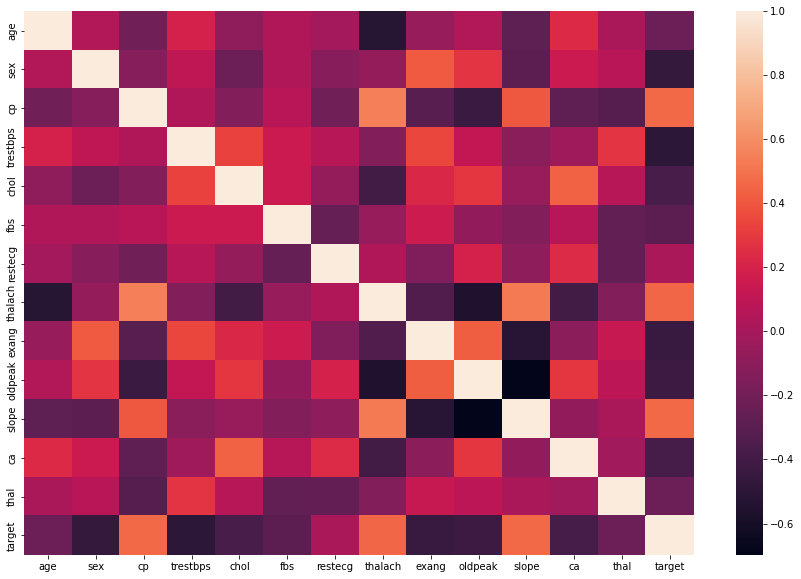

In [50]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=False)

In [51]:
x=df1.iloc[:,0:-1]

In [52]:
y=df1.iloc[:,-1]

In [69]:
rand=RandomForestClassifier()
rand.fit(x,y)

RandomForestClassifier()

In [60]:
x.shape

(30, 13)

In [61]:
y.shape

(30,)

In [54]:
rand.feature_importances_

array([0.09447003, 0.07183082, 0.0599384 , 0.17280216, 0.1022299 ,
       0.0237965 , 0.01575584, 0.1373275 , 0.04495398, 0.10006173,
       0.02581206, 0.0531502 , 0.09787088])

In [56]:
rand.feature_importances_.shape

(13,)

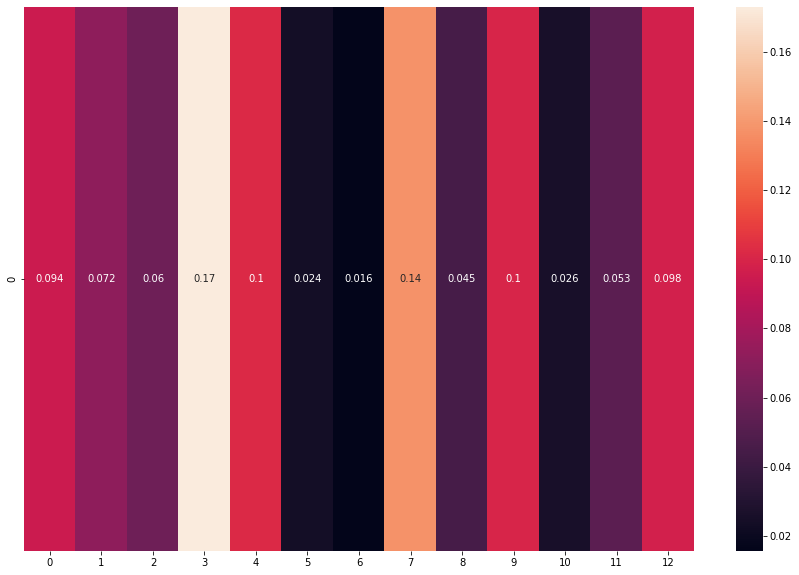

In [68]:
plt.subplots(figsize=(15,10))
sns.heatmap(rand.feature_importances_.reshape(1,13), annot=True)